In [25]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data=pd.read_csv("data/ride_data.csv")
# Combine the data into a single dataset
city_ride_data=pd.merge(city_data,ride_data, on="city")
# Display the data table for preview
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [26]:
city_ride_data.columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [27]:
#min and max fare
city_ride_data.describe()

,driver_count,fare,ride_id
count,2375.000000,2375.000000,2.375000e+03
mean,28.930105,26.753112,4.887270e+12
std,20.666306,12.109465,2.907361e+12
min,1.000000,4.050000,3.218337e+08
25%,11.000000,17.190000,2.381175e+12
50%,23.000000,26.600000,4.748541e+12
75%,45.000000,36.645000,7.461936e+12
max,73.000000,58.550000,9.991538e+12


In [28]:
type_group=city_ride_data.groupby('type')
count_type=type_group['type'].count()
count_type

type
Rural        125
Suburban     625
Urban       1625
Name: type, dtype: int64

## Bubble Plot of Ride Sharing Data

In [52]:
urban_cities = city_ride_data[city_ride_data["type"] == "Urban"]
sub_cities = city_ride_data[city_ride_data["type"] == "Suburban"]
rural_cities = city_ride_data[city_ride_data["type"] == "Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
sub_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]

urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
sub_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]

urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]
sub_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

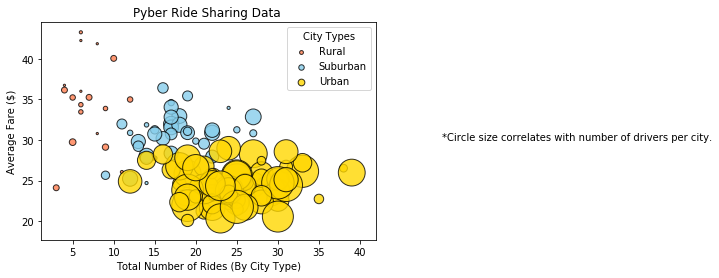

In [74]:
# Build the scatter plots for each city types

plt.scatter(rural_ride_count,rural_avg_fare,s=5*rural_driver_count, c="coral",edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Rural")


plt.scatter(sub_ride_count,sub_avg_fare, s=10*sub_driver_count, c="skyblue", edgecolor="black", linewidths=1, marker="o",
alpha=0.8, label="Suburban")

plt.scatter(urban_ride_count, urban_avg_fare, s=15*urban_driver_count, c="gold",edgecolor="black", linewidths=1, marker="o",
alpha=0.8, label="Urban")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data ")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (By City Type)")


# Create a legend
lgnd = plt.legend(fontsize="medium", mode="Expanded",numpoints=1, scatterpoints=1,loc="best", title="City Types",labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [15]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [45]


# Incorporate a text label regarding circle size
plt.text(50, 30,"*Circle size correlates with number of drivers per city.")

# Save Figure
plt.savefig("../Images/PyberScatter.png")

# Show plot
plt.show()

## Total Fares by City Type

In [54]:
fare_type=city_ride_data.groupby('type').fare.sum()
fare_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [55]:
fare_type.sum()

63538.63999999999

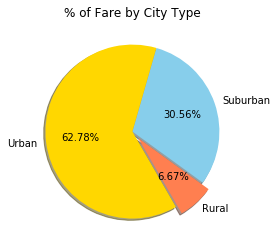

In [65]:
# Calculate Type Percents

Rural_fare=fare_type['Rural']/63538.64
Suburban_fare=fare_type['Suburban']/63538.64
Urban_fare=fare_type['Urban']/63538.64


# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = [24, 110, 226]
colors = ["coral", "skyblue", "gold"]
explode = (0.1, 0, 0)
plt.title("% of Fare by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=300)
# Save Figure
plt.savefig("../Images/PyberFares.png")

#Show Figure
plt.show()

## Total Rides by City Type

In [57]:
rides_type=city_ride_data.groupby('type').ride_id.count()
rides_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [58]:
rides_type.sum()

2375

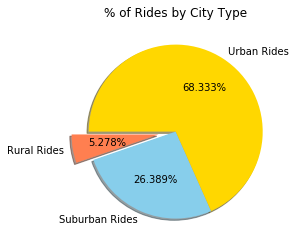

In [64]:
Rural_Drivers=total_drivers['Rural']/2375
Suburban_Drivers=total_drivers['Suburban']/2375
Urban_Drivers=total_drivers['Urban']/2375
# Build Pie Chart
labels = ["Rural Rides", "Suburban Rides", "Urban Rides"]
sizes = [19, 95,246]
colors = ["coral", "skyblue", "gold"]
explode = (0.2, 0, 0)
plt.title("% of Rides by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.3f%%", shadow=True, startangle=180)
# Save Figure
plt.savefig("../Images/PyberRiders.png")

# Show Figure
plt.show()

## Total Drivers by City Type

In [60]:
total_drivers=city_ride_data.groupby('type').driver_count.sum()
total_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [61]:
city_ride_data.driver_count.sum()

68709

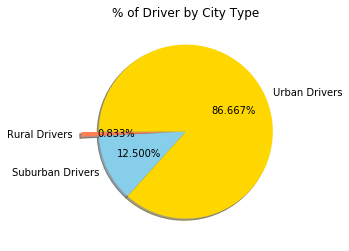

In [62]:
# Calculate Ride Percents
Rural_Drivers=total_drivers['Rural']/68709
Suburban_Drivers=total_drivers['Suburban']/68709
Urban_Drivers=total_drivers['Urban']/68709
# Build Pie Chart
labels = ["Rural Drivers", "Suburban Drivers", "Urban Drivers"]
sizes = [3, 45, 312]
colors = ["coral", "skyblue", "gold"]
explode = (0.2, 0, 0)
plt.title("% of Driver by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.3f%%", shadow=True, startangle=180)
# Save Figure
plt.savefig("../Images/PyberDriver.png")

# Show Figure
plt.show()